<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2-5.-프로젝트:-SentencePiece-사용하기" data-toc-modified-id="2-5.-프로젝트:-SentencePiece-사용하기-1">2-5. 프로젝트: SentencePiece 사용하기</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Step-1.-SentencePiece-설치하기" data-toc-modified-id="Step-1.-SentencePiece-설치하기-1.0.1">Step 1. SentencePiece 설치하기</a></span></li><li><span><a href="#Step-2.-SentencePiece-모델-학습" data-toc-modified-id="Step-2.-SentencePiece-모델-학습-1.0.2">Step 2. SentencePiece 모델 학습</a></span></li><li><span><a href="#Step-3.-Tokenizer-함수-작성" data-toc-modified-id="Step-3.-Tokenizer-함수-작성-1.0.3">Step 3. Tokenizer 함수 작성</a></span></li><li><span><a href="#Step-4.-네이버-영화리뷰-감정분석-문제에-SentencePiece-적용해-보기" data-toc-modified-id="Step-4.-네이버-영화리뷰-감정분석-문제에-SentencePiece-적용해-보기-1.0.4">Step 4. 네이버 영화리뷰 감정분석 문제에 SentencePiece 적용해 보기</a></span><ul class="toc-item"><li><span><a href="#네이버-영화리뷰-감정분석-코퍼스에-sentencepiece를-적용시킨-모델-학습하기" data-toc-modified-id="네이버-영화리뷰-감정분석-코퍼스에-sentencepiece를-적용시킨-모델-학습하기-1.0.4.1">네이버 영화리뷰 감정분석 코퍼스에 sentencepiece를 적용시킨 모델 학습하기</a></span></li><li><span><a href="#학습된-모델로-sp_tokenize()-메소드-구현하기" data-toc-modified-id="학습된-모델로-sp_tokenize()-메소드-구현하기-1.0.4.2">학습된 모델로 sp_tokenize() 메소드 구현하기</a></span></li><li><span><a href="#구현된-토크나이저를-적용하여-네이버-영화리뷰-감정분석-모델을-재학습하기" data-toc-modified-id="구현된-토크나이저를-적용하여-네이버-영화리뷰-감정분석-모델을-재학습하기-1.0.4.3">구현된 토크나이저를 적용하여 네이버 영화리뷰 감정분석 모델을 재학습하기</a></span></li><li><span><a href="#KoNLPy-형태소-분석기를-사용한-모델과-성능-비교하기" data-toc-modified-id="KoNLPy-형태소-분석기를-사용한-모델과-성능-비교하기-1.0.4.4">KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기</a></span></li><li><span><a href="#(보너스)-SentencePiece-모델의-model_type,-vocab_size-등을-변경해-가면서-성능-개선-여부-확인하기" data-toc-modified-id="(보너스)-SentencePiece-모델의-model_type,-vocab_size-등을-변경해-가면서-성능-개선-여부-확인하기-1.0.4.5">(보너스) SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기</a></span></li></ul></li><li><span><a href="#루브릭" data-toc-modified-id="루브릭-1.0.5">루브릭</a></span></li><li><span><a href="#Postscript" data-toc-modified-id="Postscript-1.0.6">Postscript</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-1.0.7">Reference</a></span></li></ul></li></ul></li></ul></div>

# 2-5. 프로젝트: SentencePiece 사용하기

### Step 1. SentencePiece 설치하기
---
SentencePiece는 SentencePiece는 Google에서 제공하는 오픈소스 기반 Sentence Tokenizer/Detokenizer 로서, BPE와 unigram 2가지 subword 토크나이징 모델 중 하나를 선택해서 사용할 수 있도록 패키징한 것입니다. 아래 링크의 페이지에서 상세한 내용을 파악할 수 있습니다.

- [google/sentencepiece](https://github.com/google/sentencepiece)

위 페이지의 서두에서도 언급하고 있듯, SentencePiece는 딥러닝 자연어처리 모델의 앞부분에 사용할 목적으로 최적화되어 있는데, 최근 pretrained model들이 거의 대부분 SentencePiece를 tokenizer로 채용하면서 사실상 표준의 역할을 하고 있습니다. 앞으로의 실습 과정에서 자주 만나게 될 것이므로 꼭 친숙해지시기를 당부드립니다.

다음과 같이 설치를 진행합니다. SentencePiece는 python에서 쓰라고 만들어진 라이브러리는 아니지만 편리한 파이썬 wrapper를 아래와 같이 제공하고 있습니다.

```
$ pip install sentencepiece
```

### Step 2. SentencePiece 모델 학습
---
앞서 배운 `tokenize()` 함수를 기억하나요? 다시 한번 상기시켜드릴게요!

```
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer
```

위와 같이 `tf.keras.preprocessing.text.Tokenizer`에 corpus를 주고 `tokenizer.fit_on_texts(corpus)`을 하면 토크나이저 내부적으로 단어사전과 토크나이저 기능을 corpus에 맞춤형으로 자동생성해 주는 것입니다.

그럼 이를 위해서 SentencePiece 모델을 학습하는 과정을 거쳐야 합니다.

In [1]:
import sentencepiece as spm
import os

```
import sentencepiece as spm
import os

temp_file = os.getenv(
    'HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(
        temp_file, vocab_size)
)
# 위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*
```

위 코드를 실행하면 정상적으로 SentencePiece 모델 학습이 완료된 후 korean_spm.model 파일과 korean_spm.vocab vocabulary 파일이 생성되었음을 확인할 수 있습니다.

그럼 이렇게 학습된 SentencePiece 모델을 어떻게 활용하는지 살펴보겠습니다.

In [2]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.', 1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1244, 11, 306, 7, 3599, 11, 286, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


어떻습니까? SentencePiece의 토크나이징 실력이 괜찮은 것 같습니다.

### Step 3. Tokenizer 함수 작성
---
우리는 위에서 훈련시킨 SentencePiece를 활용하여 위 함수와 유사한 기능을 하는 `sp_tokenize()` 함수를 정의할 겁니다. 하지만 _SentencePiece_ 가 동작하는 방식이 단순 토큰화와는 달라 완전히 동일하게는 정의하기 어렵습니다. 그러니 아래 조건을 만족하는 함수를 정의하도록 하습니다.

>1) _매개변수로 토큰화된 문장의 `list`를 전달하는 대신 **온전한 문장**의 `list` 를 전달합니다._  
>
>2) _**생성된 vocab 파일**을 읽어와 `{ <word> : <idx> }` 형태를 가지는 `word_index` 사전과 `{ <idx> : <word> }` 형태를 가지는 `index_word` 사전을 생성하고 함께 **반환**합니다._  
>
>3) _리턴값인 `tensor` 는 앞의 함수와 동일하게 토큰화한 후 Encoding된 문장입니다. 바로 학습에 사용할 수 있게 Padding은 당연히 해야겠죠?_

In [3]:
import tensorflow as tf

In [4]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx: word})
        index_word.update({word: idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(
        tensor, padding='post')

    return tensor, word_index, index_word

In [5]:
# sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[1949 5662    5    4 7975 1983    3    0    0    0    0    0    0    0]
 [ 107 1638  101    4    0  419   11    4   14    0 1969    3    3    3]]


### Step 4. 네이버 영화리뷰 감정분석 문제에 SentencePiece 적용해 보기
---
아마 여러분들은 [네이버 영화리뷰 감정분석 태스크](https://github.com/e9t/nsmc/)를 한 번쯤은 다루어 보았을 것입니다. 한국어로 된 corpus를 다루어야 하므로 주로 KoNLPy에서 제공하는 형태소 분석기를 사용하여 텍스트를 전처리해서 RNN 모델을 분류기로 사용했을 것입니다.

만약 이 문제에서 tokenizer를 sentencepiece로 바꾸어 다시 풀어본다면 더 성능이 좋아질까요? 비교해 보는 것도 흥미로울 것입니다.

##### 1) 데이터 로드하기

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
train_data = pd.read_table(os.getenv('HOME')+'/aiffel/sp_tokenizer/data/ratings_train.txt')
test_data = pd.read_table(os.getenv('HOME')+'/aiffel/sp_tokenizer/data/ratings_test.txt')
print(f'훈련용 리뷰 개수 : {len(train_data)}')
print(f'테스트용 리뷰 개수 : {len(test_data)}')

훈련용 리뷰 개수 : 150000
테스트용 리뷰 개수 : 50000


##### 2) 데이터 정제하기

In [8]:
# document 열에서 중복인 내용이 있다면 중복 제거
train_data.drop_duplicates(subset=['document'], inplace=True)
train_data = train_data.dropna(how='any')  # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any())  # Null 값이 존재하는지 확인

False


In [9]:
print(f'훈련용 샘플의 수 : {len(train_data)}')

훈련용 샘플의 수 : 146182


<AxesSubplot:>

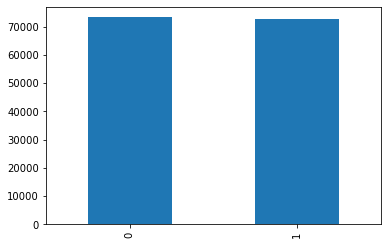

In [10]:
# train_data에서 해당 리뷰의 긍/부정 유무가 기재되어있는 레이블(label) 값의 분포를 보겠습니다.
train_data['label'].value_counts().plot(kind='bar')

In [11]:
test_data.drop_duplicates(subset=['document'], inplace=True)# document 열에서 중복인 내용이 있다면 중복 제거
test_data = test_data.dropna(how='any') # Null 값 제거
print(f'전처리 후 테스트용 샘플의 개수 : {len(test_data)}')

전처리 후 테스트용 샘플의 개수 : 49157


##### 3) 토큰화, 정수 인코딩

#### 네이버 영화리뷰 감정분석 코퍼스에 sentencepiece를 적용시킨 모델 학습하기

In [12]:
file_path = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/'
model_prefix = 'ratings_train_spm'

In [13]:
def make_txt(file_path, file_name, target_name):
    # 네이버 영화리뷰 감정분석 코퍼스 파일에서 텍스트 부분만 추출해 타겟파일에 저장합니다.
    with open(file_path+file_name, 'r') as f:
        data = [line.split('\t')[1] for line in f.read().splitlines()[1:]]

    with open(file_path+target_name, 'w') as f:
        for row in data:
            f.write(str(row)+'\n')

In [14]:
# ratings.txt의 텍스트를 추출해 텍스트 파일로 저장합니다.
make_txt(file_path, 'ratings_train.txt', 'ratings_train_document.txt')

In [15]:
vocab_size = 8000  # 16000, 32000

# SentencePiece 모델을 학습합니다.
spm.SentencePieceTrainer.Train(
    f'--input={file_path}ratings_train_document.txt ' +
    f'--model_prefix={model_prefix} ' +
    f'--vocab_size={vocab_size} ' +
    '--pad_id=0 --pad_piece=[PAD] ' +  # pad (0)
    '--unk_id=1 --unk_piece=[UNK] ' +  # unknown (1)
    '--bos_id=2 --bos_piece=[BOS] ' +  # begin of sequence (2)
    '--eos_id=3 --eos_piece=[EOS]'  # end of sequence (3)
)
# 위 Train에서 --model_type='unigram'이 디폴트 적용되어 있습니다.
# --model_type='bpe' 로 옵션을 주어 변경할 수 있습니다.

#### 학습된 모델로 sp_tokenize() 메소드 구현하기

In [16]:
def sp_tokenize(s, corpus, model_prefix):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open('./' + model_prefix + '.vocab', 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx: word})
        index_word.update({word: idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(
        tensor, padding='post')
    
    return tensor, word_index, index_word

In [27]:
s.Load('ratings_train_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.', 1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1403, 11, 394, 16, 1333, 11, 138, 18, 5]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


In [18]:
X_train, word_index, index_word = sp_tokenize(
    s, train_data['document'], model_prefix)

In [19]:
X_test = []
for sen in test_data['document']:
    X_test.append(s.EncodeAsIds(sen))
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=len(X_train[0]), padding='post')

In [20]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

#### 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정분석 모델을 재학습하기

In [21]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [23]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('GDNLP_02_sp_best_model.h5', monitor='val_acc',
                     mode='max', verbose=1, save_best_only=True)

In [24]:
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    model = Sequential()
    model.add(Embedding(vocab_size, 100))
    model.add(LSTM(128))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


In [25]:
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
INFO:tensorflow:batch_all_reduce: 5 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:batch_all_reduce: 5 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 t

In [26]:
loaded_model = load_model('GDNLP_02_sp_best_model.h5')
print("\n 테스트 정확도 : %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1537/1537 [==============================] - 10s 6ms/step - loss: 0.6932 - acc: 0.4973

 테스트 정확도 : 0.4973


In [47]:
def sentiment_predict(new_sentence):
    encoded = []
    encoded.append(s.EncodeAsIds(new_sentence))  # 토큰화, 정수 인코딩
    pad_new = tf.keras.preprocessing.sequence.pad_sequences(
        encoded, maxlen=len(X_train[0]), padding='post')  # 패딩
    score = float(loaded_model.predict(pad_new))  # 예측
    if(score > 0.5):
        print('{:.2f}% 확률로 긍정 리뷰입니다.\n'.format(score*100))
    else:
        print('{:.2f}% 확률로 부정 리뷰입니다.\n'.format((1-score)*100))

In [48]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

50.46% 확률로 부정 리뷰입니다.



In [49]:
sentiment_predict('이 영화 핵노잼 ㅠㅠ')

50.46% 확률로 부정 리뷰입니다.



In [50]:
sentiment_predict('이딴게 영화냐 ㅉㅉ')

50.46% 확률로 부정 리뷰입니다.



In [51]:
sentiment_predict('감독 뭐하는 놈이냐?')

50.46% 확률로 부정 리뷰입니다.



In [52]:
sentiment_predict('와 개쩐다 정말 세계관 최강자들의 영화다')

50.46% 확률로 부정 리뷰입니다.



#### KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기

#### (보너스) SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기

- Word Vector는 활용할 필요가 없습니다. 활용이 가능하지도 않을 것입니다.
- 머지않아 SentencePiece와 BERT 등의 pretrained 모델을 함께 활용하는 태스크를 다루게 될 것입니다.

### 루브릭
---

아래의 기준을 바탕으로 프로젝트를 평가합니다.

|평가문항|상세기준|
|:---|:---|
|1. SentencePiece를 이용하여 모델을 만들기까지의 과정이 정상적으로 진행되었는가?|코퍼스 분석, 전처리, SentencePiece 적용, 토크나이저 구현 및 동작이 빠짐없이 진행되었는가?|
|2. SentencePiece를 통해 만든 Tokenizer가 자연어처리 모델과 결합하여 동작하는가?|SentencePiece 토크나이저가 적용된 Text Classifier 모델이 정상적으로 수렴하여 80% 이상의 test accuracy가 확인되었다.|
|3. SentencePiece의 성능을 다각도로 비교분석하였는가?|SentencePiece 토크나이저를 활용했을 때의 성능을 다른 토크나이저 혹은 SentencePiece의 다른 옵션의 경우와 비교하여 분석을 체계적으로 진행하였다.|

### Postscript
---
- row data에 대한 성능을 살펴보기 위해 특수문자 등을 제거하지 않았는데, 그래서 그런지 성능이 생각보다 안 좋게 나왔다.

### Reference
---
[6) 네이버 영화 리뷰 감성 분류하기(Naver Movie Review Sentiment Analysis) - 딥 러닝을 이용한 자연어 처리 입문](https://wikidocs.net/44249)